# Rubber Price Prediction Project 

Table of Contents

## Part 1: Problem Statement

1. What is your problem statement? What will you actually be doing?
    - Predict ribbed smoked sheet price for estimate trend for 1 month for make maximum profit of that month.
2. Who is your audience? Why will they care?
    - rubber cooperative facing the problem with don't get maximum profit or worse loss money from rubber price fluctuation.
3. What is your success metric? How will you know if you are actually solving the problem in a useful way?
    - Better than use average ribbed smoked sheet price of previous month. use RMSE as metrics. 
4. What is your data source? What format is your data in? How much cleaning and munging will be required?
    - Data sources from raot.com for historical rubber prices and investing.com for futures price such as tocom, sicom, etc. and currency price.
    - Format of data are csv.
    - Cleaning parts are joining data with date from main dataset and clean missing vlaue.
5. What are potential challenges or obstacles and how will you mitigate them?
    - develop a good time series model because it hard to do it well and also how to approach to audience.
6. Is this a reasonable project given the time constraints that you have?
    - yes because this project isn't complex much. Now I have all data.
    
    
![workflow](../image/workflow.jpg)

### Problem Statements

Build model to predict **ribbed smoked sheet** prices next 1 month for estimate trend of prices for Rubber cooperative. Model performance will evaluate by RMSE, Model will deploy if performance better than baseline 10%.

### Background Information

- explain rubber industry in south
- explain what is rubber and rubber types
- explain why I need to do it
- explain who is my audience
- explain my goal

### Outside Research

- find research about rubber price
- find news about industry

### Dataset

Rubber Dataset<br>
Data dict

variables|meaning|dataset|source|
--|--|--|--|

From 
   1. rubber 2560-2565
   2. fob
   3. other prices 
   


## Part 2: Data Preparation

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kaleido
# Set chart style to ggplot
import matplotlib
matplotlib.style.use('ggplot')

from scipy import stats


from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

### Import dataset
All data need to set date column as index for analysis.

In [2]:
# create function for import data and set date type to datetime and set as index
# and set end date in october
def import_csv_dateindex(csv_file):
    df = pd.read_csv(f'../data/{csv_file}')
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

#### Rubber

In [3]:
# import rubber_price dataset and set date as index
rubber_price = import_csv_dateindex('rubber_price.csv')
rubber_price.head()

latex  cup_lump  rubber_sheet  ribbed_smoked_sheet
date                                                          
2017-09-19    NaN       NaN         52.56                55.04
2017-09-20    NaN       NaN         51.51                53.28
2017-09-21    NaN       NaN         51.51                53.14
2017-09-22    NaN       NaN         51.78                53.30
2017-09-25    NaN       NaN         50.58                53.22

In [4]:
# check types of all columns
# all columns store in correct type which is float
rubber_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2017-09-19 to 2022-10-31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latex                809 non-null    float64
 1   cup_lump             1052 non-null   float64
 2   rubber_sheet         1240 non-null   float64
 3   ribbed_smoked_sheet  1240 non-null   float64
dtypes: float64(4)
memory usage: 48.4 KB


In [5]:
# count value in rubber_price df
rubber_price.resample('y').count()

latex  cup_lump  rubber_sheet  ribbed_smoked_sheet
date                                                          
2017-12-31      0         0            69                   69
2018-12-31      0       123           242                  242
2019-12-31    120       239           239                  239
2020-12-31    243       244           244                  244
2021-12-31    246       246           246                  246
2022-12-31    200       200           200                  200

**Latex** is empty in year 2017 and 2018 and have half in 2019. 

**Cup Lump** is empty in year 2017 and have half in year 2018. 

#### FOB

In [6]:
# import fob dataset and set date as index
fob = import_csv_dateindex('FOB.csv')
fob.head()

rubber_sheet  latex  bid_rubber_sheet  bid_rss  bid_latex    fob
date                                                                        
2001-01-03          22.3  20.00             23.55    24.26        NaN  26.70
2001-01-04          22.3  19.50             23.25    24.30        NaN  26.25
2001-01-05          22.3  19.25             23.26    24.16        NaN  26.25
2001-01-08          22.3  19.25             23.45    24.20        NaN  25.85
2001-01-09          22.2  19.25             23.26    24.26        NaN  25.90

In [7]:
# check types of all columns
# all columns store in correct type which is float
fob.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5260 entries, 2001-01-03 to 2022-10-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rubber_sheet      5245 non-null   float64
 1   latex             5246 non-null   float64
 2   bid_rubber_sheet  5019 non-null   float64
 3   bid_rss           5221 non-null   float64
 4   bid_latex         1843 non-null   float64
 5   fob               5250 non-null   float64
dtypes: float64(6)
memory usage: 287.7 KB


In [8]:
# count value in fob df
fob.resample('y').count()

rubber_sheet  latex  bid_rubber_sheet  bid_rss  bid_latex  fob
date                                                                      
2001-12-31           244    244               244      243          0  242
2002-12-31           245    245               246      246          0  246
2003-12-31           244    244               244      244          0  243
2004-12-31           241    241               241      241        146  241
2005-12-31           234    234               234      234        234  234
2006-12-31           237    237               235      236        235  237
2007-12-31           241    241               241      241        241  241
2008-12-31           244    244               244      244        244  244
2009-12-31           238    238               238      238        238  238
2010-12-31           238    238               238      238        238  238
2011-12-31           242    241               242      242        240  242
2012-12-31           242    243               241      240         21  243
2013-12-31           242    243               241      241          0  243
2014-12-31           238    238               237      238          0  238
2015-12-31           238    238               238      238          0  238
2016-12-31           241    241               239      239          0  240
2017-12-31           238    235               236      232          0  238
2018-12-31           238    238               232      236          0  238
2019-12-31           235    235               221      233          5  237
2020-12-31           241    243               174      238          0  244
2021-12-31           247    247               182      242          0  247
2022-12-31           197    198               131      197          1  198

this dataset contain Rubber sheet and Latex prices might same as `rubber_price` df and also have bid rubber price which is not relate to my goal.

**bid prices** is when you want to buy rubber from other people that had sold to government and government will allocate for someone or SME to bidding it.

fob is free on board rubber price which is ribbed smoked sheet in dice form price that foreign company (e.g. company from japan etc.) propose to buy it.

#### Related Prices

In [9]:
# import fob dataset and set date as index
related_prices = import_csv_dateindex('related_prices.csv')
related_prices.head()

tocom  sicom     jpy  sgd     usd  crude_oil
date                                                    
2010-12-03  361.7    NaN     NaN  NaN     NaN        NaN
2010-12-06  366.8    NaN  2.7530  NaN  0.0333      89.74
2010-12-07  368.5    NaN  2.7813  NaN  0.0333      89.22
2010-12-08  369.3    NaN  2.7888  NaN  0.0332      88.82
2010-12-09  372.0    NaN  2.7828  NaN  0.0333      88.88

In [10]:
# check types of all columns
# all columns store in correct type which is float
related_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3144 entries, 2010-12-03 to 2022-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tocom      2916 non-null   float64
 1   sicom      1891 non-null   float64
 2   jpy        3106 non-null   float64
 3   sgd        3102 non-null   float64
 4   usd        3106 non-null   float64
 5   crude_oil  3106 non-null   float64
dtypes: float64(6)
memory usage: 171.9 KB


In [11]:
# check missing values group in year
related_prices.resample('y').count()

tocom  sicom  jpy  sgd  usd  crude_oil
date                                              
2010-12-31     19      0   20   16   20         19
2011-12-31    245      0  260  260  260        252
2012-12-31    248      0  261  261  261        252
2013-12-31    245      0  261  261  261        256
2014-12-31    244      0  261  261  261        260
2015-12-31    244    187  261  261  261        264
2016-12-31    245    251  261  261  261        264
2017-12-31    247    249  260  260  260        263
2018-12-31    247    249  261  261  261        264
2019-12-31    242    248  261  261  261        264
2020-12-31    243    250  262  262  262        264
2021-12-31    245    251  261  261  261        263
2022-12-31    202    206  216  216  216        221

All data 

### Merge all df

In [12]:
test_latex_price = pd.merge(fob['latex'].dropna(), rubber_price['latex'].dropna(), 
                how='left', left_index=True,right_index=True).dropna()

In [13]:
print(f'Rows of latex columns in rubber_price {test_latex_price.shape[0]}')
print(f"The value of Latex price in fob df has equal values with Latex in rubber_price is\
 {(test_latex_price['latex_x'] == test_latex_price['latex_y']).sum()}")

Rows of latex columns in rubber_price 808
The value of Latex price in fob df has equal values with Latex in rubber_price is 803


From value above almost prices in Latex columns are the same. Thus, I decided to drop latex prices from rubber_price and use latex price from fob df instead because fob df contain latex prices more than rubber_price df.

In [14]:
# merge rubber price and fob select only fob price
# for rubber_price drop latex
rubber = pd.merge(rubber_price.drop(columns='latex'), fob[['latex', 'fob']], how='left', left_index=True,right_index=True)

# merge rubber and related_prices
rubber = pd.merge(rubber, related_prices, how='left', left_index=True,right_index=True)

In [15]:
rubber.resample('y').count()

cup_lump  rubber_sheet  ribbed_smoked_sheet  latex  fob  tocom  \
date                                                                         
2017-12-31         0            69                   69     69   69     66   
2018-12-31       123           242                  242    238  238    230   
2019-12-31       239           239                  239    235  237    225   
2020-12-31       244           244                  244    243  244    229   
2021-12-31       247           247                  247    247  247    235   
2022-12-31       200           200                  200    198  198    187   

            sicom  jpy  sgd  usd  crude_oil  
date                                         
2017-12-31     67   69   69   69         69  
2018-12-31    234  242  242  242        241  
2019-12-31    231  239  239  239        238  
2020-12-31    235  244  244  244        242  
2021-12-31    240  247  247  247        245  
2022-12-31    194  200  200  200        200

For some columns they still have missing values but I will leave it there for now because I will decide to drop or impute in the feature selection part.

### Duplicate Data

In [16]:
# finding duplicate data
rubber[rubber.index.duplicated()]

cup_lump  rubber_sheet  ribbed_smoked_sheet  latex   fob  tocom  \
date                                                                          
2021-07-13      43.5         50.83                52.32   44.5  59.2  213.9   

            sicom     jpy      sgd     usd  crude_oil  
date                                                   
2021-07-13  185.5  3.3888  24.0723  0.0306      65.03

In [17]:
# check for duplicate values
rubber.loc['2021-07-13']

cup_lump  rubber_sheet  ribbed_smoked_sheet  latex   fob  tocom  \
date                                                                          
2021-07-13      43.5         50.83                52.32   44.5  59.2  213.9   
2021-07-13      43.5         50.83                52.32   44.5  59.2  213.9   

            sicom     jpy      sgd     usd  crude_oil  
date                                                   
2021-07-13  185.5  3.3888  24.0723  0.0306      65.03  
2021-07-13  185.5  3.3888  24.0723  0.0306      65.03

Found that date 2021-07-13 is duplicated values. Need to drop it.

In [18]:
# filter duplicate value and save only first one
rubber = rubber[~rubber.index.duplicated(keep='first')]

In [19]:
# check result
rubber.loc[['2021-07-13']]

cup_lump  rubber_sheet  ribbed_smoked_sheet  latex   fob  tocom  \
date                                                                          
2021-07-13      43.5         50.83                52.32   44.5  59.2  213.9   

            sicom     jpy      sgd     usd  crude_oil  
date                                                   
2021-07-13  185.5  3.3888  24.0723  0.0306      65.03

In [20]:
rubber = rubber.resample('B').mean()

In [21]:
rubber[rubber.index.weekday >= 5]

Empty DataFrame
Columns: [cup_lump, rubber_sheet, ribbed_smoked_sheet, latex, fob, tocom, sicom, jpy, sgd, usd, crude_oil]
Index: []

### Missing Values

In [22]:
rubber.fillna(method='ffill', inplace=True)

In [23]:
# check fill na work correctly
rubber.head()

cup_lump  rubber_sheet  ribbed_smoked_sheet  latex   fob  tocom  \
date                                                                          
2017-09-19       NaN         52.56                55.04   51.5  60.1  208.8   
2017-09-20       NaN         51.51                53.28   50.5  59.7  210.0   
2017-09-21       NaN         51.51                53.14   50.0  59.7  207.8   
2017-09-22       NaN         51.78                53.30   50.0  58.7  207.0   
2017-09-25       NaN         50.58                53.22   50.0  58.7  207.0   

            sicom     jpy      sgd     usd  crude_oil  
date                                                   
2017-09-19  174.3  3.3735  24.5647  0.0302      51.77  
2017-09-20  178.2  3.3905  24.5431  0.0302      51.79  
2017-09-21  175.3  3.3970  24.5323  0.0302      51.63  
2017-09-22  176.5  3.3853  24.5801  0.0302      51.67  
2017-09-25  178.0  3.3757  24.5031  0.0302      51.41

For Cup Lump it not fill missing values because the value start collected at year 2018.

In [24]:
# check frequency type
rubber.index.freq

<BusinessDay>

In [60]:
rubber.isna().sum()

cup_lump               204
rubber_sheet             0
ribbed_smoked_sheet      0
latex                    0
fob                      0
tocom                    0
sicom                    0
jpy                      0
sgd                      0
usd                      0
crude_oil                0
dtype: int64

---

## Part 3: EDA

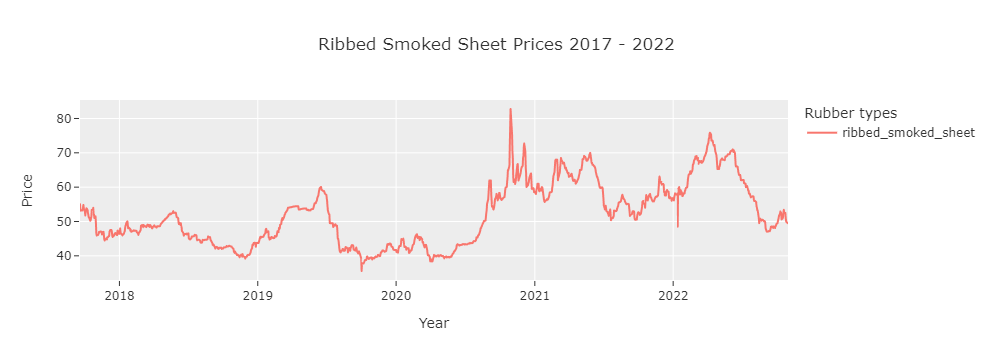

In [25]:
# plot ribbed_smoked_sheet price line chart
px.line(rubber, y=["ribbed_smoked_sheet"],title='Ribbed Smoked Sheet Prices 2017 - 2022',
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'})

From chart above it roughly hard to try analyze the chart because price are swing and messy. So, I decide to do a rolling for 1 month for smooth line chart.

In [26]:
# create function for plot line chart with moving average data
def plot_line(li_cols, rolling, df, title=None):
    # need to drop na for make line connected
    fig = px.line(df.rolling(rolling).mean().dropna(subset=li_cols), y=li_cols,
        title=title,
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'})
    fig.show()

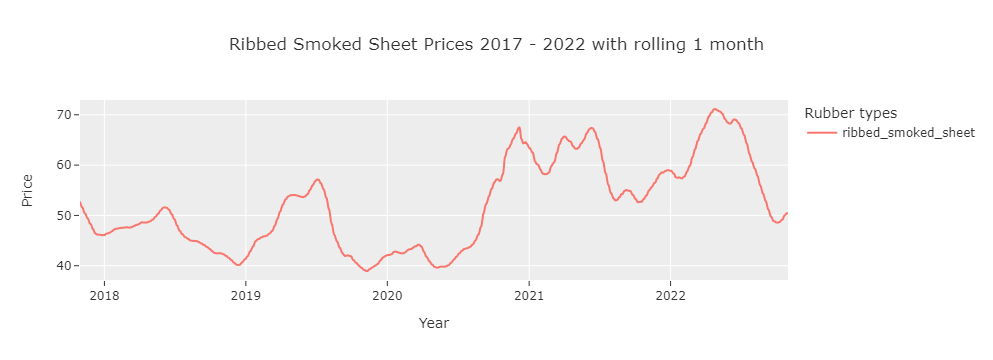

In [27]:
# plot ribbed_smoked_sheet price line chart
plot_line(['ribbed_smoked_sheet'], 30, rubber, 'Ribbed Smoked Sheet Prices 2017 - 2022 with rolling 1 month')

**Analysis**
- Ribbed smoke sheet prices have a chance to have seasonality
- Price will always rise up in middle of the year
- Price will always fall down in last of the year

### Rubber Types

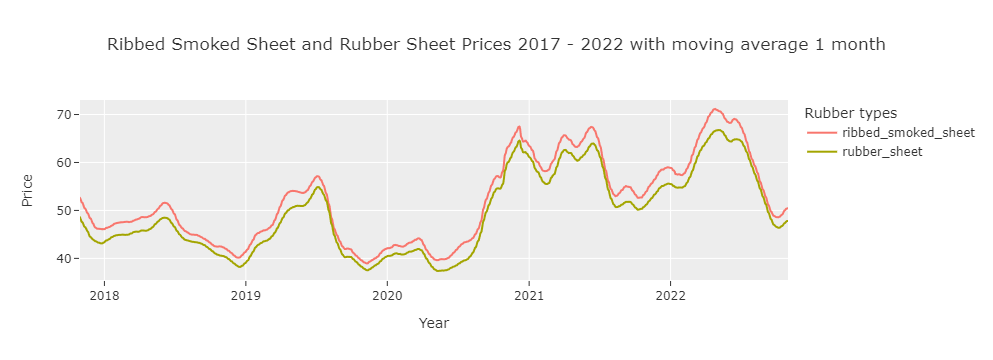

In [28]:
# plot ribbed_smoked_sheet and rubber_sheet price line chart
plot_line(['ribbed_smoked_sheet', 'rubber_sheet'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Rubber Sheet Prices 2017 - 2022 with moving average 1 month')

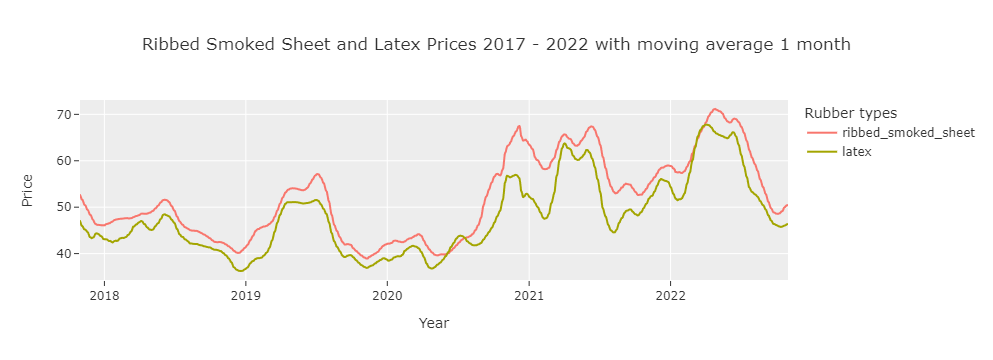

In [29]:
# plot ribbed_smoked_sheet and latex prices line chart
plot_line(['ribbed_smoked_sheet', 'latex'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Latex Prices 2017 - 2022 with moving average 1 month')

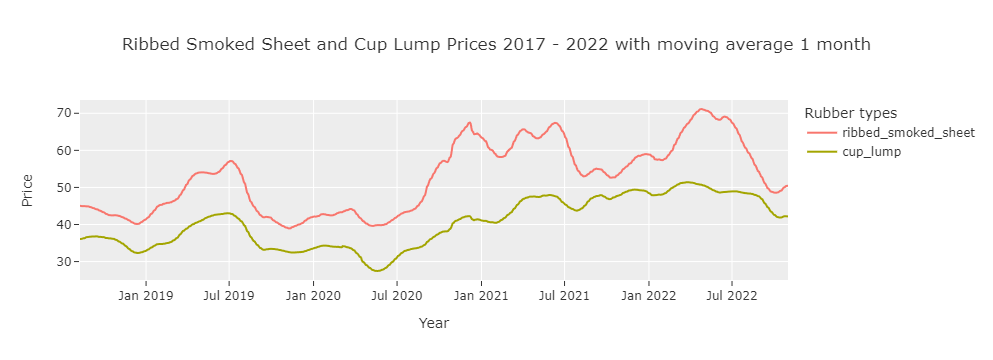

In [30]:
# plot ribbed_smoked_sheet and cup_lump prices line chart
plot_line(['ribbed_smoked_sheet', 'cup_lump'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Cup Lump Prices 2017 - 2022 with moving average 1 month')

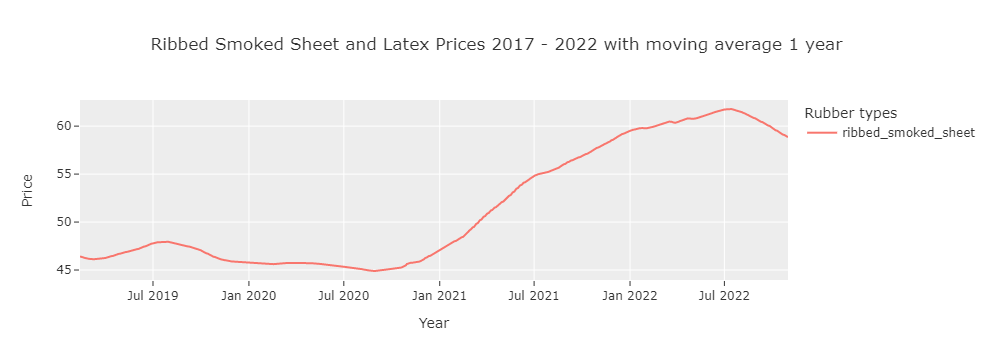

In [31]:
# plot ribbed_smoked_sheet and moving average for 1 year line chart
plot_line(['ribbed_smoked_sheet'], 365,
          rubber, title = 'Ribbed Smoked Sheet and Latex Prices 2017 - 2022 with moving average 1 year')

From chart above ribbed smoked sheet have trend price increase from year 2019 to year 2022

### Futures
For RSS prices compare to other features that is not THB currency we need to standardize to all prices for easily to compare.

In [32]:
# apply standardize function to df and store as new df
rubber_sc = rubber.apply(stats.zscore)
rubber_sc.head()

cup_lump  rubber_sheet  ribbed_smoked_sheet     latex       fob  \
date                                                                          
2017-09-19       NaN      0.364774             0.337235  0.438583  0.268279   
2017-09-20       NaN      0.242505             0.143361  0.319819  0.226095   
2017-09-21       NaN      0.242505             0.127939  0.260437  0.226095   
2017-09-22       NaN      0.273945             0.145564  0.260437  0.120635   
2017-09-25       NaN      0.134209             0.136751  0.260437  0.120635   

               tocom     sicom       jpy       sgd       usd  crude_oil  
date                                                                     
2017-09-19  0.206672 -0.105351 -0.832814  0.840512 -0.562972  -0.464776  
2017-09-20  0.236346  0.021311 -0.707351  0.820130 -0.562972  -0.463475  
2017-09-21  0.181943 -0.072873 -0.659380  0.809939 -0.562972  -0.473877  
2017-09-22  0.162161 -0.033901 -0.745728  0.855043 -0.562972  -0.471276  
2017-09-25  0.162161  0.014816 -0.816577  0.782386 -0.562972  -0.488179

#### Tocom

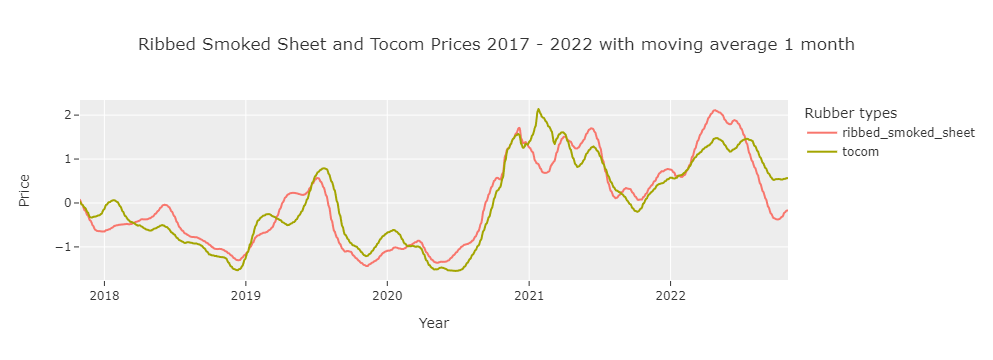

In [33]:
# plot ribbed_smoked_sheet and latex prices line chart
plot_line(['ribbed_smoked_sheet', 'tocom'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

#### Sicom

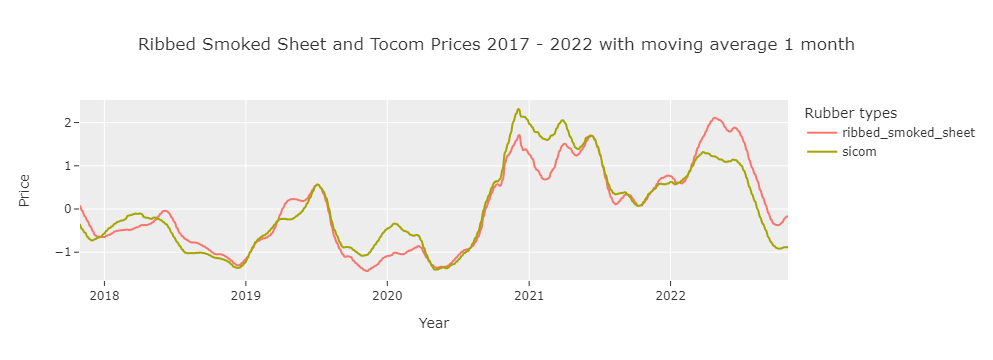

In [34]:
# plot ribbed_smoked_sheet and sicom prices line chart
plot_line(['ribbed_smoked_sheet', 'sicom'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

### Currency

#### THB convert to JPY

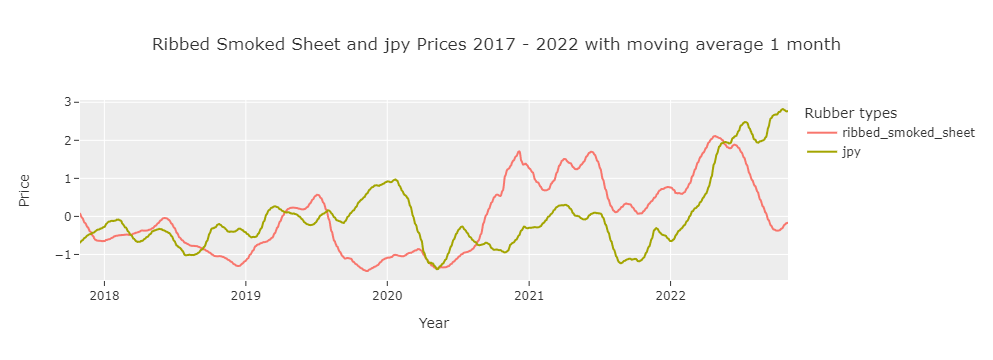

In [35]:
# plot ribbed_smoked_sheet and jpy prices line chart
plot_line(['ribbed_smoked_sheet', 'jpy'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and jpy Prices 2017 - 2022 with moving average 1 month')

#### SGD Convert to THB

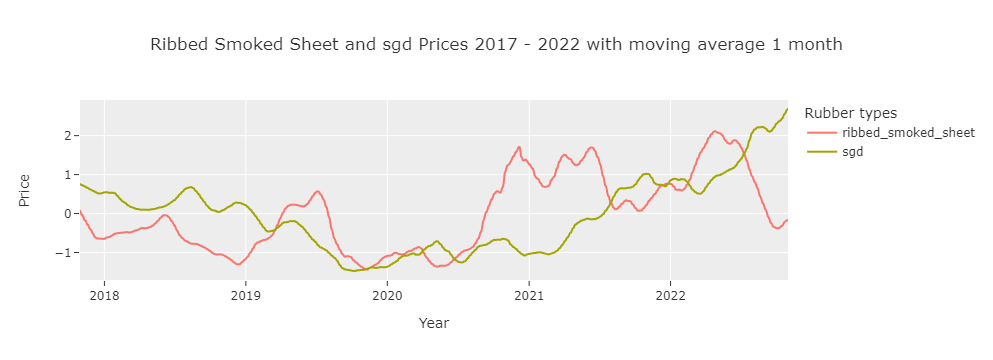

In [36]:
# plot ribbed_smoked_sheet and sgd prices line chart
plot_line(['ribbed_smoked_sheet', 'sgd'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and sgd Prices 2017 - 2022 with moving average 1 month')

#### THB Convert to USD

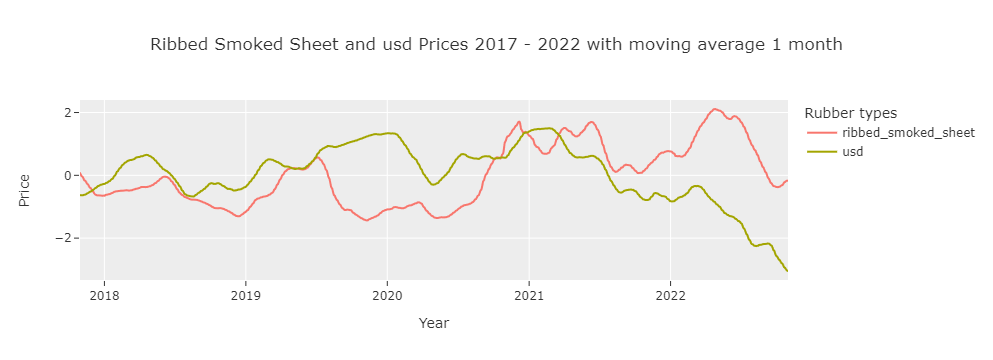

In [37]:
# plot ribbed_smoked_sheet and usd prices line chart
plot_line(['ribbed_smoked_sheet', 'usd'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and usd Prices 2017 - 2022 with moving average 1 month')

### Other commodity

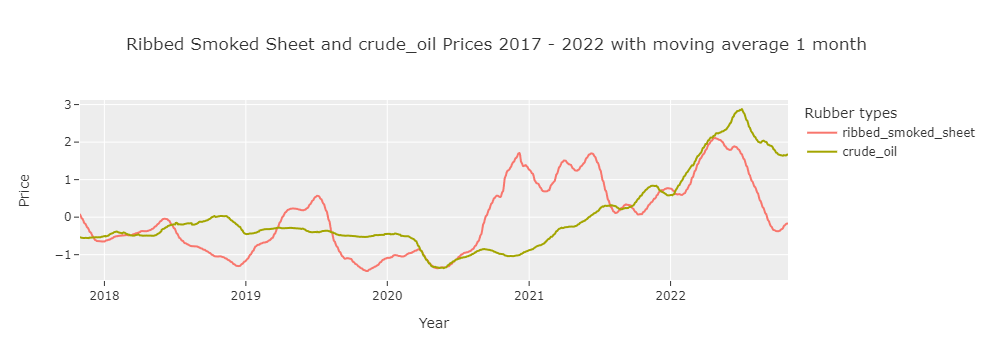

In [38]:
# plot ribbed_smoked_sheet and usd prices line chart
plot_line(['ribbed_smoked_sheet', 'crude_oil'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and crude_oil Prices 2017 - 2022 with moving average 1 month')

### Correlation

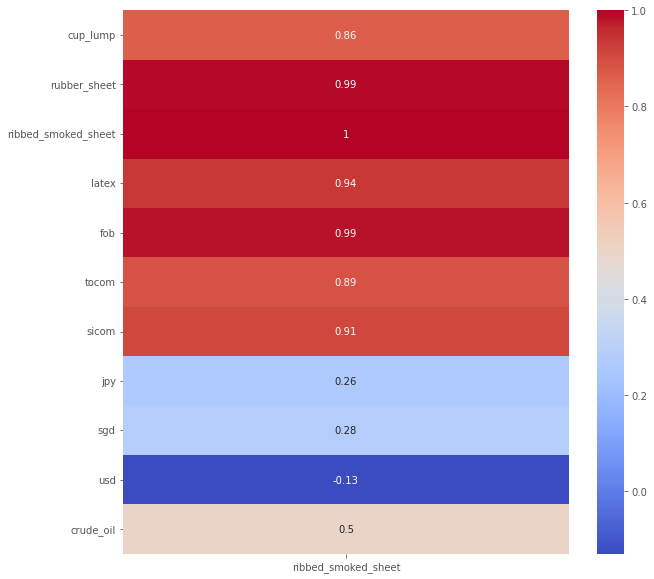

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(rubber.corr()[['ribbed_smoked_sheet']], annot=True, cmap='coolwarm');

### Seasonality

In [40]:
def create_corr_plot(series, title=None, plot_pacf=False):
    corr_array = pacf(series.dropna(), alpha=0.05) if plot_pacf else acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines', fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title=f'{title} Partial Autocorrelation (PACF)' if plot_pacf else f'{title} Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show()

In [41]:
def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    x_values = dates if dates is not None else np.arange(len(result.observed))
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed'),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend'),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal'),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual'),
            row=4,
            col=1,
        )
        .update_layout(
            height=900, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False
        )
    )

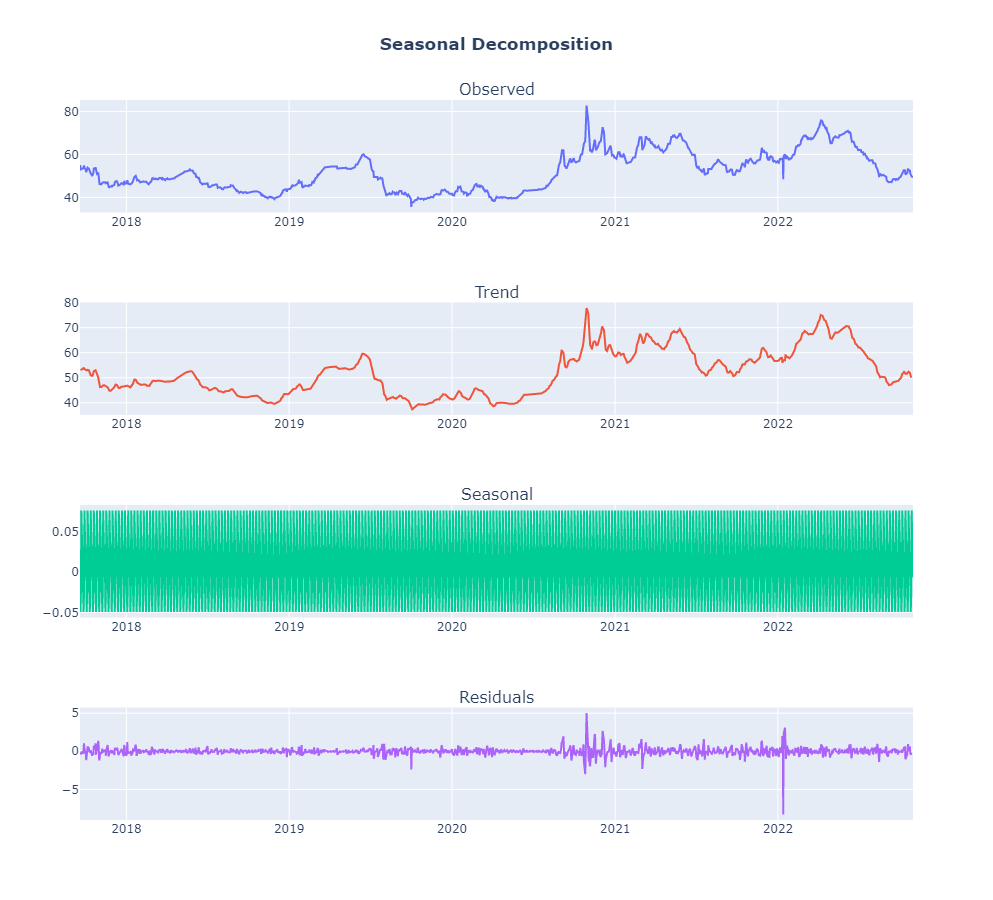

In [42]:
# decompose seasonality but for Business day frequenty can't find
decomposition = seasonal_decompose(rubber['ribbed_smoked_sheet'])
plot_seasonal_decompose(decomposition, dates=rubber.index)

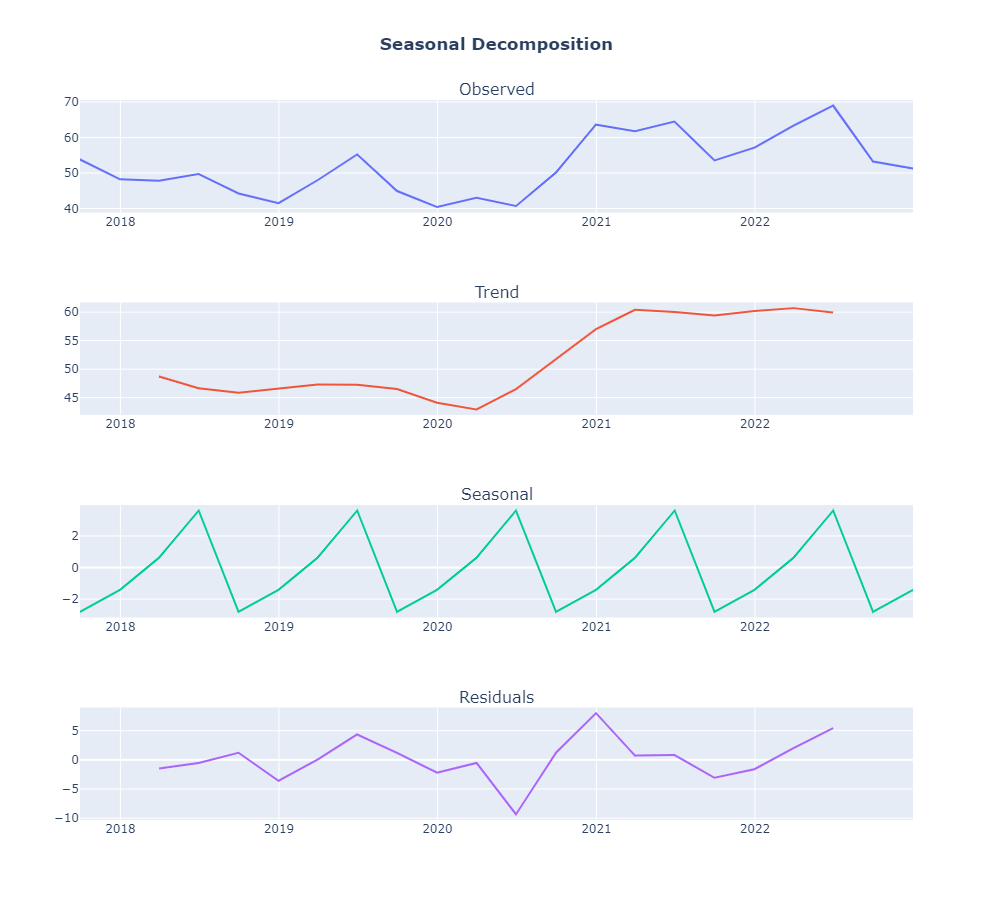

In [43]:
# decompose seasonality but for Business day frequenty can't find
decomposition = seasonal_decompose(rubber['ribbed_smoked_sheet'].resample('Q').mean())
plot_seasonal_decompose(decomposition, dates=rubber['ribbed_smoked_sheet'].resample('Q').mean().index)

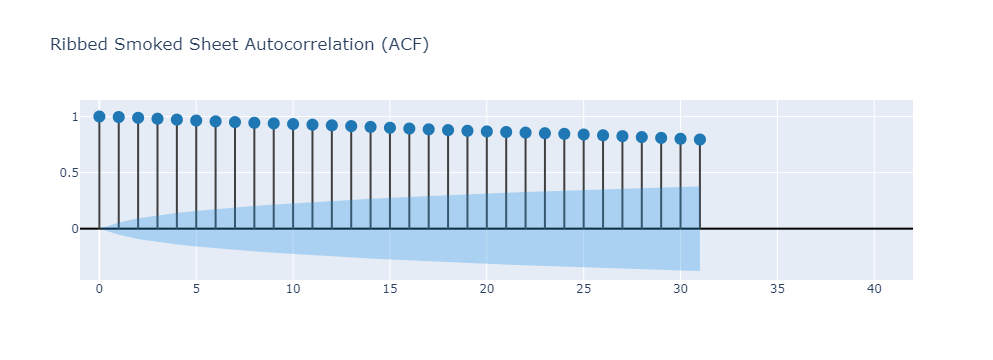

In [51]:
create_corr_plot(rubber['ribbed_smoked_sheet'], 'Ribbed Smoked Sheet')

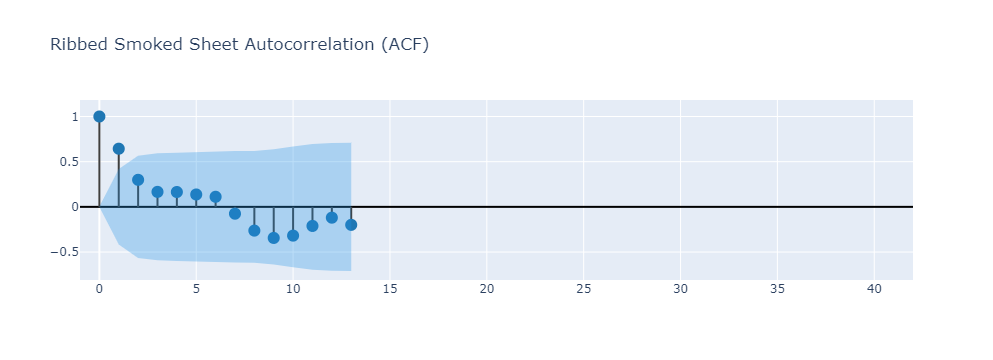

In [50]:
create_corr_plot(rubber.resample('Q').mean()['ribbed_smoked_sheet'], 'Ribbed Smoked Sheet')

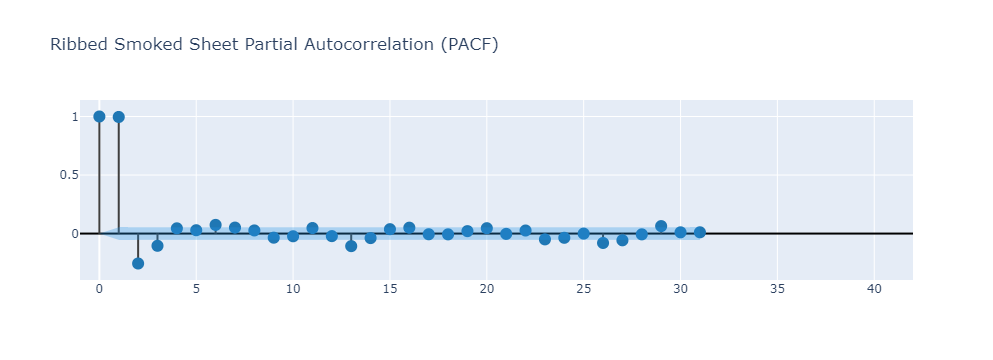

In [52]:
create_corr_plot(rubber['ribbed_smoked_sheet'], 'Ribbed Smoked Sheet', plot_pacf=True)

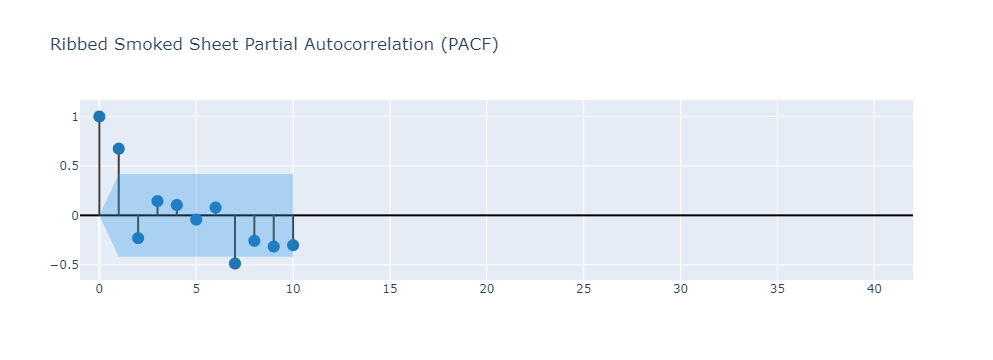

In [45]:
create_corr_plot(rubber.resample('Q').mean()['ribbed_smoked_sheet'], 'Ribbed Smoked Sheet', plot_pacf=True)

### Stationary

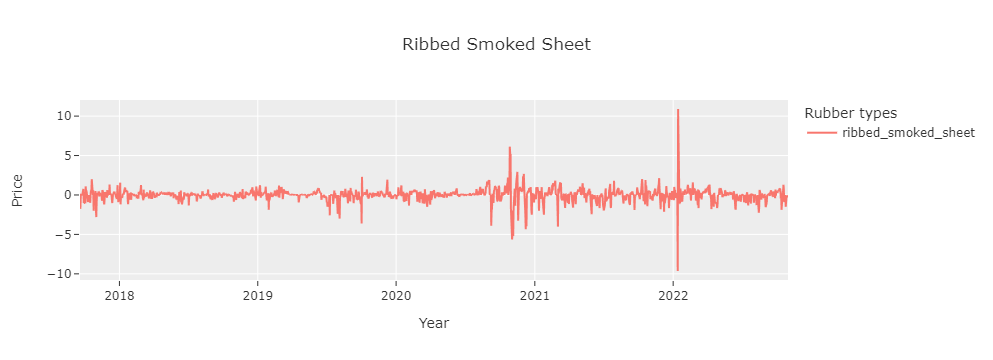

In [46]:
# plot ribbed_smoked_sheet price line chart
px.line(rubber.diff(), y=["ribbed_smoked_sheet"],title='Ribbed Smoked Sheet',
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'})

In [47]:
# use adfuller for test stationary in data
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], 
                         index=['Test Statistic','p-value', 
                                'Lag Used'])
    return dfoutput

In [59]:
# Run ADF test on the original Real GDP data
interpret_dftest(adfuller(rubber['usd'].diff().dropna()))

Test Statistic   -1.610839e+01
p-value           5.043845e-29
Lag Used          3.000000e+00
dtype: float64

In [49]:
rubber.to_csv('../data/rubber.csv')